# Hometask 6
The assignments are to be submitted in the form of one jupyter notebook.

## Task 1
In this assignment, you are to download this dataset - [link](https://drive.google.com/file/d/1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6/view?usp=share_link). Here you will find 2 files - a two-dimensional dataset and a mnist dataset. For each of them, apply the K-means algorithm for clustering. Use the elbow method to find the optimal number of clusters.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline 

#### Data import

In [2]:
path_data_2d = "data/data_2d.csv"
path_data_mnist = "data/mnist.csv"

In [3]:
data_2d = pd.read_csv(path_data_2d)
data_mnist = pd.read_csv(path_data_mnist)

In [4]:
data_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [5]:
data_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### K-means

In [6]:
def kmeans_elbow_method(data):
    distortion = []
    r = range(1, 15)
    for i in r:
        kmean = KMeans(n_clusters=i, n_init=10).fit(data)
        distortion.append(kmean.inertia_)
    plt.plot(r, distortion)
    plt.grid()
    plt.show()

#### Let's visualize the elbow method for mnist:

Reduce the data dimension to a 2-D version:

In [7]:
pca_data_mnist = PCA(n_components=2).fit_transform(data_mnist)

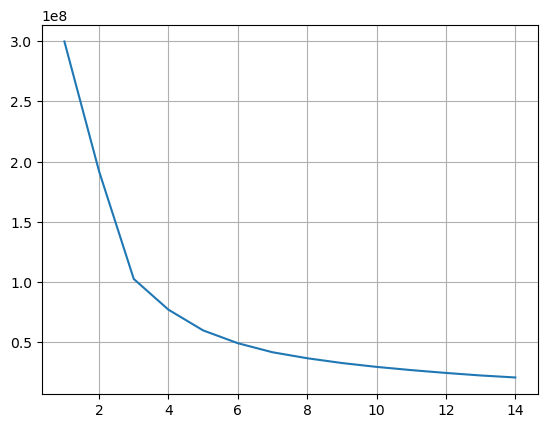

In [8]:
kmeans_elbow_method(pca_data_mnist)

The optimal number of clusters for mnist is 3

#### Let's visualize the elbow method for data_2d:

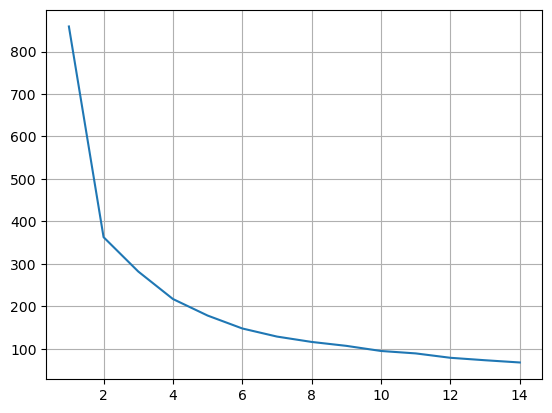

In [9]:
kmeans_elbow_method(data_2d)

The optimal number of clusters for data_2d is 2

## Task 2
Visualize the result of clustering. For the case of the mnist dataset, you will also need to use the PCA algorithm to reduce the dimensionality of your data to a 2-dimensional version.

In [10]:
def show_clustering(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(data)
    
    plt.figure(figsize=(16,8))
    sns.scatterplot(x=data[:,0], y=data[:,1], c= kmeans.labels_, cmap='cool' )
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

In [11]:
pca_data_2d = PCA(n_components=2).fit_transform(data_2d)

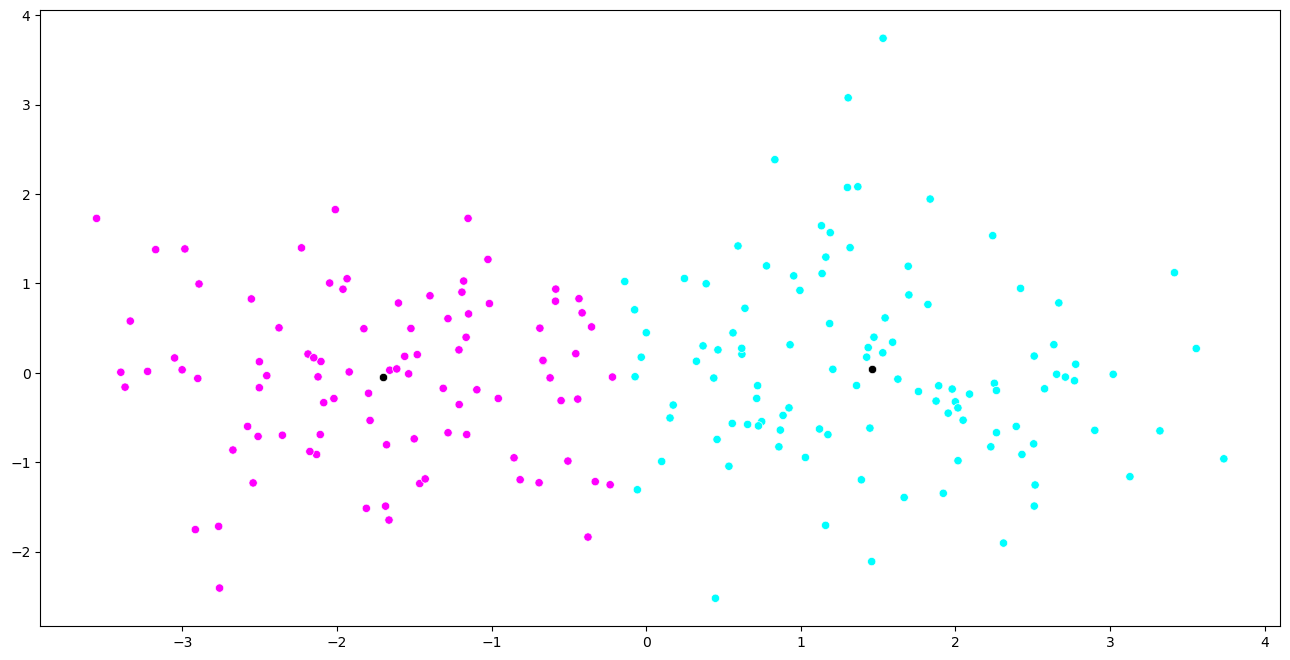

In [12]:
show_clustering(pca_data_2d, 2)

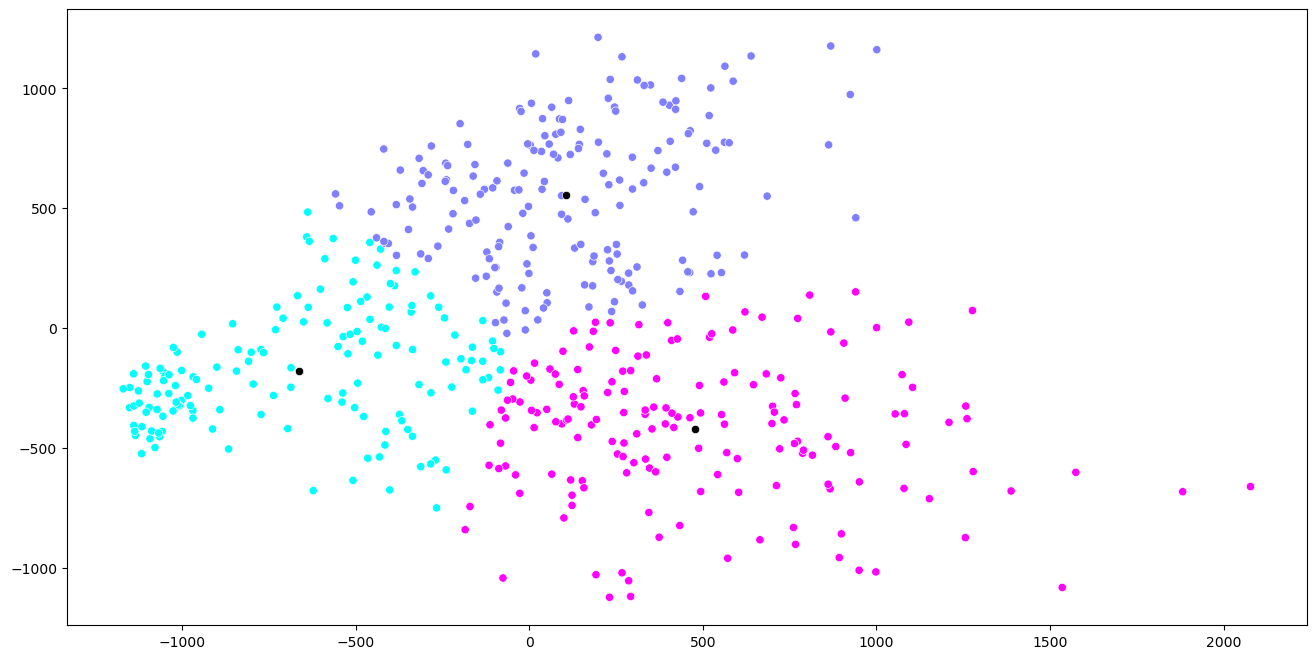

In [13]:
show_clustering(pca_data_mnist, 3)